# Norwegian Petroleum Directorate
This is an integrated visualisation of the data available at https://factpages.npd.no/en.  
The factpages are separated into tabs;
Wellbore, Licence, BAA, Field, Discovery, Company, Survey, Facility, TUF, Stratigraphy

The visualisations below represent data from Wellbore, Licence, Field, Discovery, Company and Stratigraphy


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#sns.set_theme()
sns.set_style('darkgrid')

In [2]:
# Links and load function
from npd_load.load import load

Load data under Wellbore tab

In [3]:
link_key = 'well_explCurrent'
df = load(link_key)

In [4]:
def abs_val_op(val):
    a  = int(np.round(val/100.*(df.groupby('wlbDrillingOperator').size()).sum(), 0))
    return a

def abs_val_hc(val):
    a  = int(np.round(val/100.*(df.groupby('wlbContent').size()).sum(), 0))
    return a

In [5]:
data0 = df.groupby('wlbDrillingOperator').size().sort_values(ascending=False)
data1 = df.groupby('wlbContent', dropna=False).size()

# WELLBORE
## Drilling Results: Current year
See Table View: Exploration: Current year

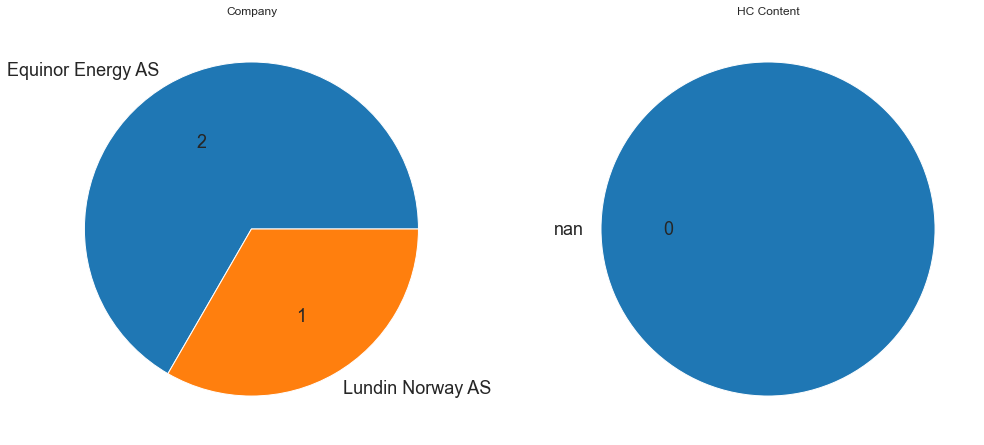

In [6]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
ax[0].pie(data0, labels=data0.index, autopct=abs_val_op, textprops={'fontsize': 18}); ax[0].set_title('Company')
ax[1].pie(data1, labels=data1.index, autopct=abs_val_hc, textprops={'fontsize': 18}); ax[1].set_title('HC Content')
fig.tight_layout(pad=5.0)
plt.savefig("./figures/drilling_current.png")
plt.show()

In [7]:
def abs_val_op(val):
    a  = int(np.round(val/100.*(df.groupby('wlbDrillingOperator').size().sort_values(ascending=False).head(10)).sum(), 0))
    return a

def abs_val_hc(val):
    a  = int(np.round(val/100.*(df.groupby('wlbContent').size()).sum(), 0))
    return a

In [8]:
link_key = 'well_prevYear'
df = load(link_key)

In [9]:
data0 = df.groupby('wlbDrillingOperator').size().sort_values(ascending=False).head(10)
data1 = df.groupby('wlbContent', dropna=False).size()

## Drilling Results: Previous year
See Table View: Exploration: Last year

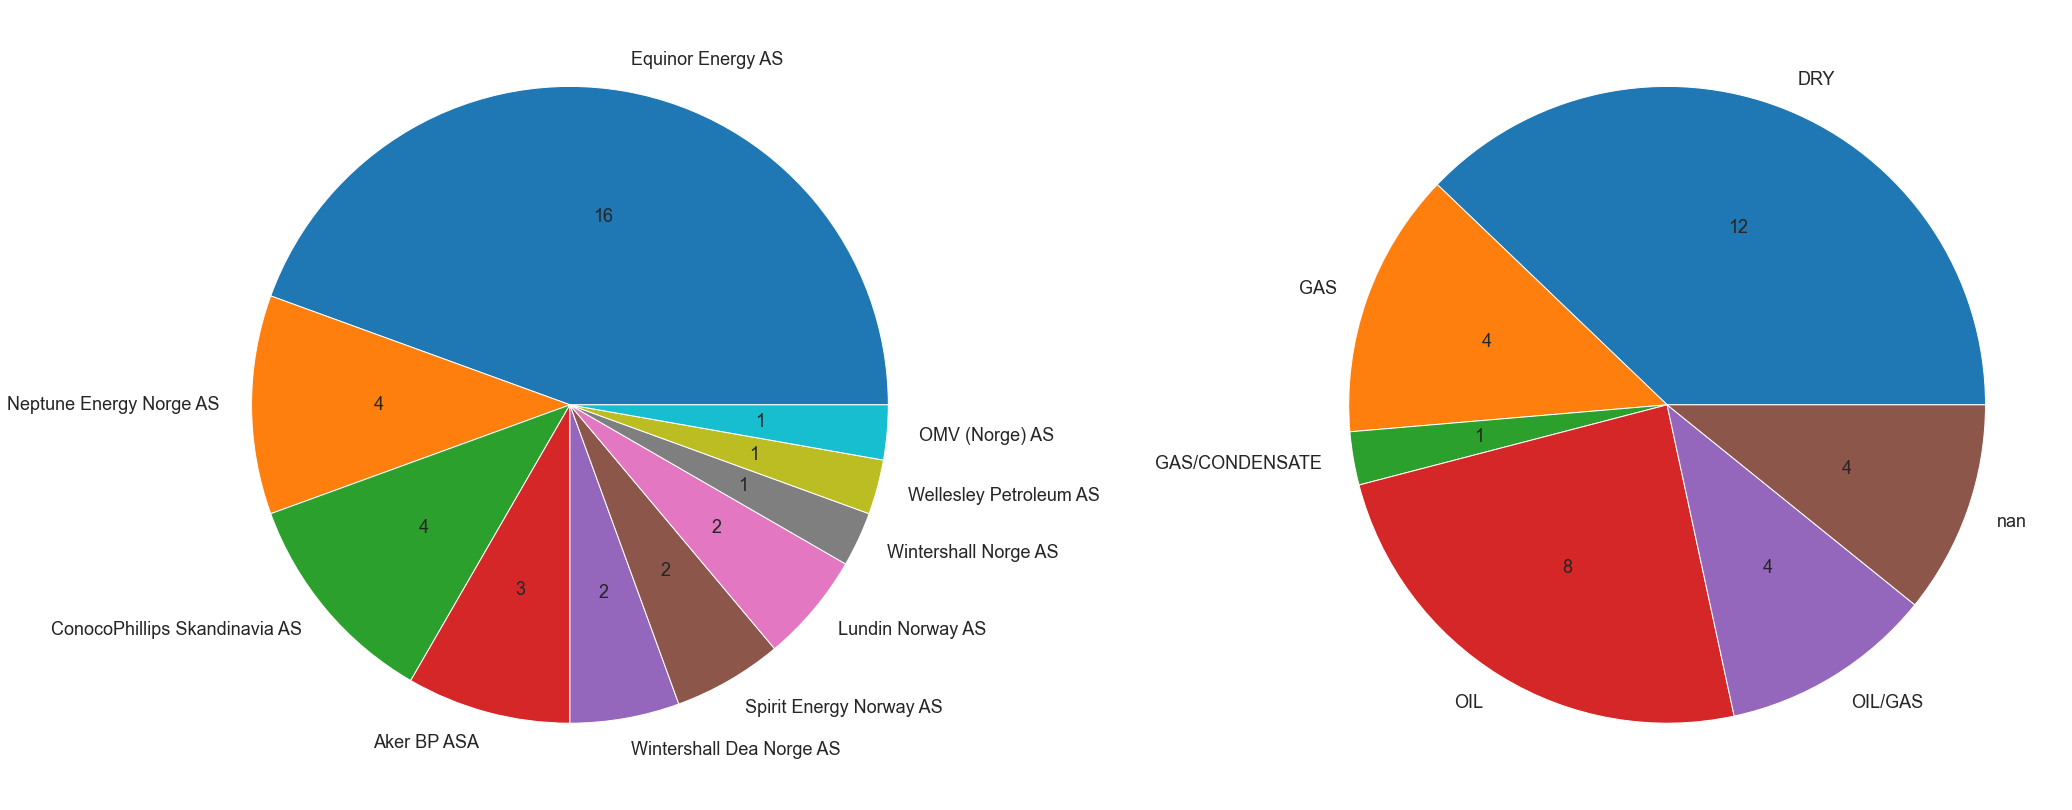

In [10]:
fig, ax = plt.subplots(1,2, figsize=(30,15))
ax[0].pie(data0, labels=data0.index, autopct=abs_val_op, textprops={'fontsize': 18})
ax[1].pie(data1, labels=data1.index, autopct=abs_val_hc, textprops={'fontsize': 18})
fig.tight_layout(pad=5.0)
plt.savefig("./figures/drilling_previous.png")
plt.show()

In [ ]:
link_key = 'well_expl10years'
df = load(link_key)

In [ ]:
data0 = df.groupby('wlbDrillingOperator').size().sort_values(ascending=False).head(10)
data1 = df.groupby('wlbContent', dropna=False).size()

## Drilling Results: Previous 10 years
See Table View: Exploration: Last 10 years

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(30,15))
ax[0].pie(data0, labels=data0.index, autopct=abs_val_op, textprops={'fontsize': 18})
ax[1].pie(data1, labels=data1.index, autopct=abs_val_hc, textprops={'fontsize': 18})
fig.tight_layout(pad=5.0)
plt.savefig("./figures/drilling_10.png")
plt.show()

In [ ]:
link_key = 'well_allLong'
df = load(link_key)

In [ ]:
data0 = df.groupby('wlbDrillingOperator').size().sort_values(ascending=False).head(10)
data1 = df.groupby('wlbContent', dropna=False).size()

## Drilling Results: All (showing only top 10 company results)
See Table View: Exploration: All - long list

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(30,15))
ax[0].pie(data0, labels=data0.index, autopct=abs_val_op, textprops={'fontsize': 18})
ax[1].pie(data1, labels=data1.index, autopct=abs_val_hc, textprops={'fontsize': 18})
fig.tight_layout() # pad=5.0
plt.savefig("./figures/drilling_all.png")
plt.show()

In [ ]:
df = df.set_index('wlbEntryDate')
df['well_count'] = 1
wellcount_year = df['well_count'].resample('Y').sum()
wellcount_year.index = wellcount_year.index.strftime('%Y')

## Exploration wells drilled on the NCS
From Exploration: All - long list

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
wellcount_year.plot(ax=ax, kind='bar')
plt.title('Exploration Wells Drilled on the NCS', fontsize=18)
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large',)
plt.tight_layout()
plt.savefig("./figures/expl_yearly_drill.png")
plt.show()

In [ ]:
data = df.groupby(lambda x: (x.year//5)*5).count()['wlbWellboreName']
data.plot(kind='bar', figsize=(15,8), title='Wells drilled per 5 year period')
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large',)
plt.title('Exploration Wells Drilled on the NCS (5 year period)', fontsize=18)
plt.tight_layout()
plt.savefig("./figures/expl_5yearly_drill.png")
plt.show()

In [ ]:
def abs_val_op(val):
    a  = int(np.round(val/100.*(df.groupby('wlbFormationWithHc1').size().sort_values(ascending=False).head(20)).sum(), 0))
    return a

def abs_val_hc(val):
    a  = int(np.round(val/100.*(df.groupby('wlbFormationWithHc2').size().sort_values(ascending=False).head(20)).sum(), 0))
    return a

In [ ]:
data0 = df.groupby('wlbFormationWithHc1').size().sort_values(ascending=False).head(20)
data1 = df.groupby('wlbFormationWithHc2').size().sort_values(ascending=False).head(20)

## Formation with HC
### Level 1 and level 2

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(30,15))
ax[0].pie(data0, labels=data0.index, autopct=abs_val_op, textprops={'fontsize': 18})
ax[1].pie(data1, labels=data1.index, autopct=abs_val_hc, textprops={'fontsize': 18})
fig.tight_layout() # pad=5.0
plt.savefig("./figures/hydrocarbon_levels.png")
plt.show()

# DISCOVERY
## Table view: Overview
See Table view: Overview

In [ ]:
link_key = 'disc_overview'
df = load(link_key)

## Discoveries grouped by Company

In [ ]:
data = df.groupby('cmpLongName').size().sort_values(ascending=False)
data.plot(kind='bar', figsize=(15,8), title='Company Discoveries')
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large',)
plt.title('Discoveries by Company', fontsize=18)
plt.tight_layout()
plt.savefig("./figures/discovery_ov.png")
plt.show()

In [ ]:
def absolute_value(val):
    a  = int(np.round(val/100.*(df.groupby('dscHcType').size()).sum(), 0))
    return a

## Discovery results

In [ ]:
data = df.groupby('dscHcType').size().sort_values(ascending=False)
data.plot(kind='pie', figsize=(10,10), title='Discovery Results', autopct=absolute_value)
plt.title('Discoveries Results', fontsize=18)
plt.savefig("./figures/discovery_results.png")
plt.show()

In [ ]:
disc_areas = df.groupby(['dscHcType', 'nmaName']).size().unstack()
disc_areas = disc_areas.reindex(["OIL",  "OIL/GAS", "GAS","GAS/CONDENSATE"])
disc_areas = disc_areas[['North Sea', 'Norwegian Sea', 'Barents Sea']]

## Discovery HC type by Region (North Sea, Norwegian Sea, Barents Sea)

In [ ]:
disc_areas.plot(kind='bar', figsize=(15,8), title='Discovery type by region')
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large',)
plt.title('Discovery HC type by Region', fontsize=18)
plt.legend(loc=1, prop={'size': 16})
plt.tight_layout()
plt.savefig("./figures/discovery_results_type.png")
plt.show()

In [ ]:
def absolute_value(val):
    a  = int(np.round(val/100.*(df.groupby('dscHcType').size()).sum(), 0))
    return a

## Discoveries by region (North Sea, Norwegian Sea, Barents Sea)

In [ ]:
disc_areas.plot(kind='pie', subplots=True, figsize=(30,15), autopct=absolute_value, legend=True, textprops={'fontsize': 22})
plt.title('Discovery type by region', fontsize=18)
plt.tight_layout()
plt.savefig("./figures/discovery_results_type_region.png")
plt.show()

## Discovery: Resources
See Discovery: Resources

In [ ]:
link_key = 'disc_resources'
df = load(link_key)

## Discovery Resources

In [ ]:
data = df.sort_values(by='dscRecoverableOe',ascending=False).head(20)
data.plot(kind='bar', x='dscName', y='dscRecoverableOe', figsize=(15,8), title='Discovery Resouce')
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large',)
plt.title('Discovery Resource', fontsize=18)
plt.tight_layout()
plt.savefig("./figures/discovery_resources.png")
plt.show()

# FIELD
## Table: Overview
See Field: Table: Overview

In [ ]:
link_key = 'field_overview'
df = load(link_key)

## Number of fields per region (North Sea, Norwegian Sea, Barents Sea)

In [ ]:
data = df.groupby('fldMainArea').size().sort_values(ascending=False)
data.plot(kind='bar', figsize=(10,8), title='Fields per region')
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large',)
plt.title('Number of Fields per Region', fontsize=18)
plt.tight_layout()
plt.savefig("./figures/fields_by_region.png")
plt.show()

## Fields owned by Company

In [ ]:
data = df.groupby('cmpLongName').size().sort_values(ascending=False)
data.plot(kind='bar', figsize=(15,8), title='Fields owned by Company')
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large',)
plt.title('Fields: owned by Company', fontsize=18)
plt.tight_layout()
plt.savefig("./figures/fields_by_company.png")
plt.show()

In [ ]:
field_areas = df.groupby(['cmpLongName', 'fldMainArea']).size().unstack()
field_areas = field_areas[['North Sea', 'Norwegian Sea', 'Barents Sea']]
data = field_areas.sort_values(by='North Sea', ascending=False)

## Fields owned by Company by region (North Sea, Norwegian Sea, Barents Sea)

In [ ]:
data.plot(kind='bar', figsize=(15,8), title='Fields owned by Company by region',)
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large',)
plt.title('Fields: owned by Company by Region', fontsize=18)
plt.legend(loc=1, prop={'size': 16})
plt.tight_layout()
plt.savefig("./figures/fields_by_company_by_region.png")
plt.show()

## Number of field discoveries by decade

In [ ]:
data = df.set_index('wlbCompletionDate').groupby(lambda x: (x.year//10)*10).count()['fldName']
data.plot(kind='bar', figsize=(15,8), title='Fields per decade',)
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large',)
plt.title('Number of Fields by decade', fontsize=18)
plt.tight_layout()
plt.savefig("./figures/fields_by_decade.png")
plt.show()

# STRATIGRAPHY
## Overview
Stratigraphy: Table view: Overview

In [ ]:
link_key = 'strat_wellbores'
df = load(link_key)
df = df.loc[df.groupby('wlbName').lsuTopDepth.idxmax(),:]
data = df.groupby('lsuName').count()['wlbName'].sort_values(ascending=False).head(10)

## Stratigraphy at TD

In [ ]:
data.plot(kind='pie', figsize=(8,8))
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large',)
plt.title('Stratigraphy at TD', fontsize=18)
plt.tight_layout()
plt.savefig("./figures/stratigraphy_by_TD.png")
plt.show()

# Stratigraphy: Cores

In [ ]:
link_key = 'strat_cores'
df = load(link_key)

In [ ]:
# Plot number of cores in each Formation / Group
data = df.groupby('lsuName').size().sort_values(ascending=False).head(25)
data.plot(kind='bar', figsize=(15,8),)
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large',)
plt.title('Number of cores by stratigraphic level', fontsize=18)
plt.tight_layout()
plt.savefig("./figures/core_by_formation.png")
plt.show()

# Company: Reserves

In [ ]:
link_key = 'comp_reserves'
df = load(link_key)

In [ ]:
df = df.groupby('cmpLongName').sum().sort_values(ascending=False, by='cmpRemainingOE')

In [ ]:
# company_reserves = df['cmpRemainingOE'].sort_values(ascending=False).index
company_list = df['cmpRemainingOE'].index
print(f"Number of companies reporting Reserves: {len(company_list)}")

In [ ]:
reserves_oe = df['cmpRemainingOE']
reserves = df.reset_index().sort_values(by='cmpRemainingOE', ascending=False)
data = df.reset_index().sort_values(by='cmpRemainingOE', ascending=False)

## Reserves (OE mill Sm3) by Company

In [ ]:
data.plot(kind='bar', x='cmpLongName', y='cmpRemainingOE', figsize=(15,8),)
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large',)
plt.title('Reserves (OE  mill Sm3) by Company', fontsize=18)
plt.tight_layout()
plt.savefig("./figures/reserves_by_company.png")
plt.show()

In [ ]:
data.plot(kind='bar', x='cmpLongName', y='cmpRemainingOE', ylim = [0, 200], figsize=(15,8),)
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large',)
plt.title('Reserves (OE  mill Sm3) by Company (0-200 mill Sm3)', fontsize=18)
plt.tight_layout()
plt.savefig("./figures/reserves_by_company.png")
plt.show()

In [ ]:
#data = df.reset_index().sort_values(by='cmpRemainingOE', ascending=False)
data.plot(kind='bar', x='cmpLongName', y='cmpRemainingOE', ylim = [0, 20], figsize=(15,8),)
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large',)
plt.title('Reserves (OE  mill Sm3) by Company (0-20 mill Sm3)', fontsize=18)
plt.tight_layout()
plt.savefig("./figures/reserves_by_company_zoom.png")
plt.show()

# LICENCE
## Registered
Licence: Table view: Overview

In [ ]:
link_key = 'lic_regLicensees'
df = load(link_key)

In [ ]:
print(list(enumerate(company_list, start=1)))
select = 5 # int(input("Select company: "))

compare_list = []
if select == 1:
    compare_list.extend([company_list[select-1], company_list[select], company_list[select+1]])
elif select == len(reserves):
    compare_list.extend([company_list[select-1], company_list[select-2], company_list[select-3]])
else:
    compare_list.extend([company_list[select-1], company_list[select-2], company_list[select]])

In [ ]:
partners_compare = {}

for company in compare_list:
    # filter for each company and sort by held interest in licence
    df_company = df[df['cmpLongName']==company].sort_values(by='ptlLicenseeInterest', ascending=False)
    
    # Number of licences held
    num_licences = len(df_company)
        
    # create a list of all licences for each company
    licences = list(df_company['ptlName'])
    licensees = pd.DataFrame()
    for licence in licences:
        # for each licence held by each company create df of all companies in the licence
        licensees = licensees.append(df[df['ptlName']==licence])
    
    # now create df of only partner companies
    
    partners = licensees[licensees['cmpLongName']!=company]
    partners = partners.groupby('cmpLongName').count().sort_values(by='ptlName', ascending=False)
    partners = partners['ptlName']
    partners = partners.sort_values(ascending=False)
    for partner in partners:
        partners_compare[company] = partners

## Comparison by OE

In [ ]:
fig, ax = plt.subplots(1, len(list(partners_compare.keys())), figsize=(50,20))
for i in range(len(list(partners_compare.keys()))):    
    data = list(partners_compare.values())[i]
    ax[i].pie(data, labels=partners_compare[compare_list[i]].index, textprops={'fontsize': 22})    
    ax[i].set_title(f"{compare_list[i]} : {len(list(partners_compare.values())[i])} partners : {reserves_oe[list(partners_compare.keys())[i]]:.1f} OE : {df[df['cmpLongName']==compare_list[i]].shape[0]} Licences")

plt.tight_layout()
plt.savefig("./figures/company_partner_comparison_by_reserves.png")
plt.show()

## Licence: Operators

In [ ]:
link_key = 'lic_operators'
df = load(link_key)

In [ ]:
# Filter for most recent 'prlName' (Company) that held licence
df = df.loc[df.groupby('prlName').prlOperDateValidFrom.idxmax(),:]
# Filter for current valid (NaT)
df = df[df.prlOperDateValidTo.isnull()]

In [ ]:
df[df['cmpLongName'] == company_list[select-1]]

## Licence: Work Obligations

In [ ]:
link_key = 'lic_workObligs'
df = load(link_key)

In [ ]:
df.head()

In [ ]:
df['prlTaskStatusEn'].value_counts()

In [ ]:
df = df[df['prlTaskStatusEn']=='Approved']
df = df.loc[df.groupby('prlName').prlTaskExpiryDate.idxmax(),:]

In [ ]:
df = df.loc[df.groupby('prlName').prlTaskExpiryDate.idxmax(),:]

In [ ]:
data = df.groupby('prlTaskTypeEn').size().sort_values()
data.plot(kind='barh', figsize=(15,8), fontsize=18)
plt.title('Work Obligations', fontsize=18)
plt.tight_layout()
plt.savefig("./figures/work_obligations.png")
plt.show()

# The End

# links to npd.no csv exports
company_reserves = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/company_reserves&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
licence_regLicensees = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/licence_petreg_licence_licencee&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
licence_overview = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/licence&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
licence_licensees = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/licence_licensee_hst&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
licence_operators = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/licence_oper_hst&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
licence_workobligations = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/licence_task&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
baa_licensees = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/bsns_arr_area_licensee_hst&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
field_overview = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/field&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
field_inplacevolumes = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/field_in_place_volumes&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
stratigraphy_wellbores = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/strat_litho_wellbore&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
stratigraphy_cores = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/strat_litho_wellbore_core&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
wellbore_explorationcurrent = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/wellbore_exploration_current_year&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
wellbore_exploration10years = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/wellbore_exploration_last_10_years&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
wellbore_alllong = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/wellbore_exploration_all&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
discovery_overview = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/discovery&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
discovery_resources = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/discovery_reserves&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
